In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px

In [2]:
table = pd.read_csv('./Data/sample_for_cluster_algorithm.csv')
table = table.loc[:,'avg(amount/tran)':'credit_balance']

table.head(5)

,avg(amount/tran),credit_balance
0,0.006276,-0.659356
1,0.407227,-0.385498
2,0.039221,0.186369
3,-0.605156,-0.675017
4,-0.200077,0.537368


In [3]:
#initializing the centroids
table = np.array(table)
np.random.seed(42)
centroids = [table[0]]
k = 4
for _ in range(1, k):
    dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in table])
    probs = dist_sq/dist_sq.sum()
    cumulative_probs = probs.cumsum()
    r = np.random.rand()
        
    for j, p in enumerate(cumulative_probs):
        if r < p:
            i = j
            break
    centroids.append(table[i])

centroids




[array([ 0.00627623, -0.65935578]),
 array([3.85963607, 2.63865042]),
 array([-0.13250311,  1.67421859]),
 array([ 9.10870047, -0.67423428])]

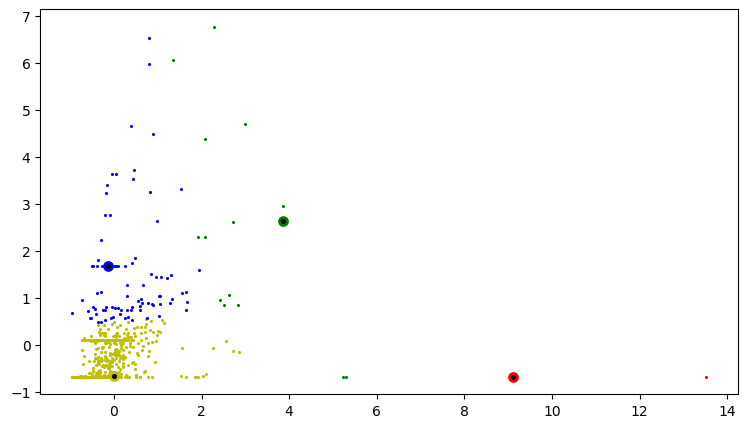

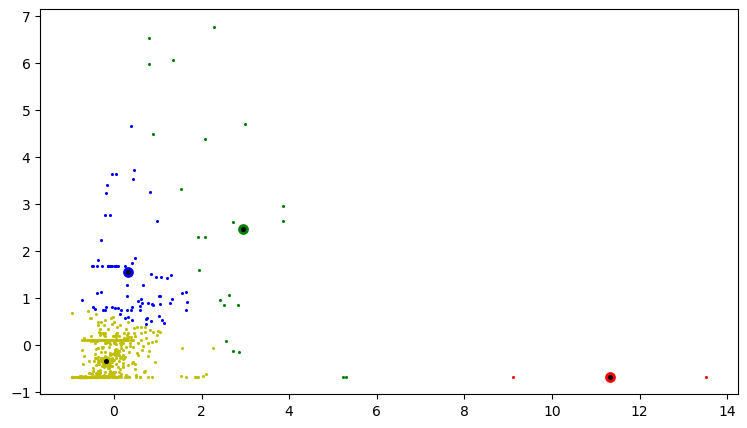

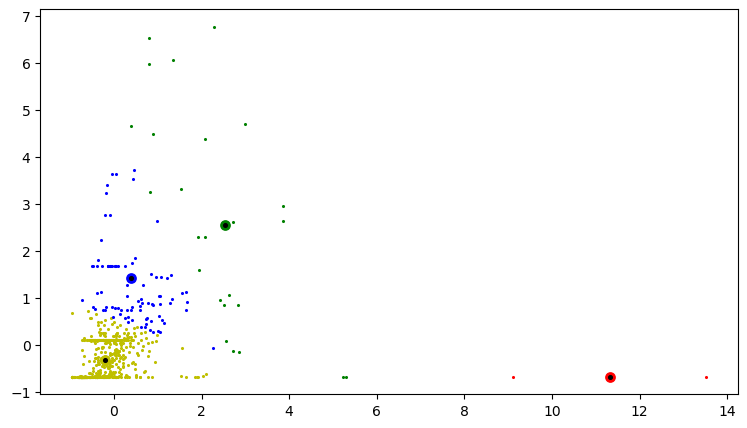

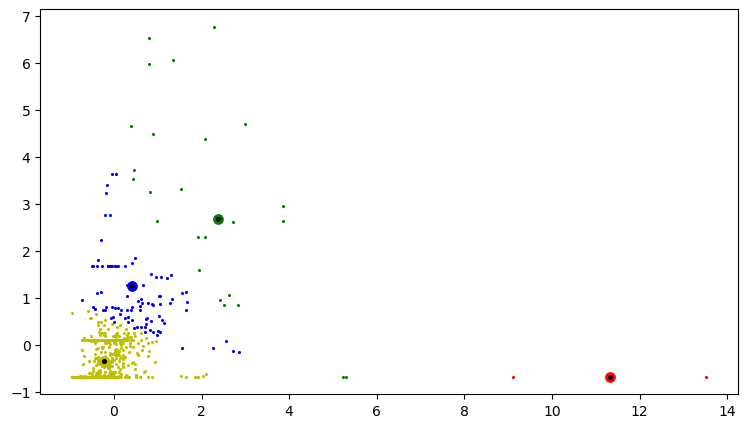

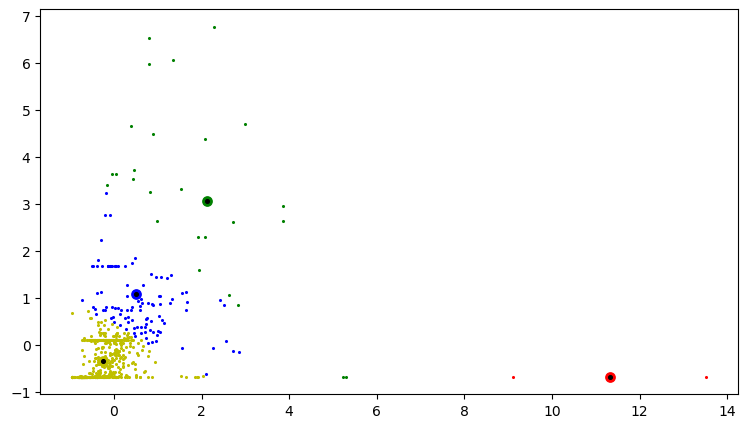

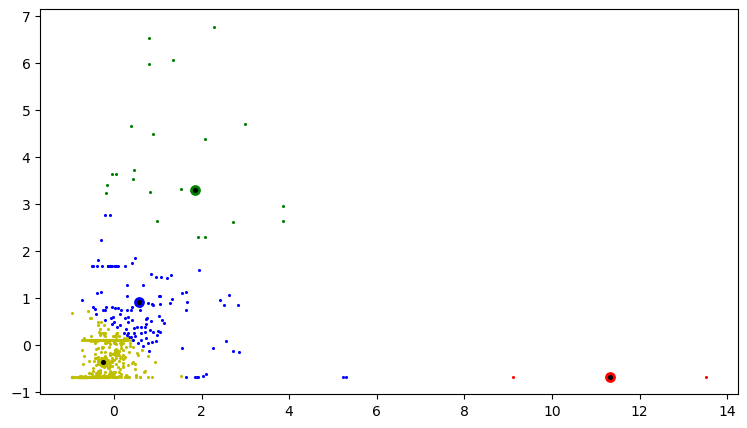

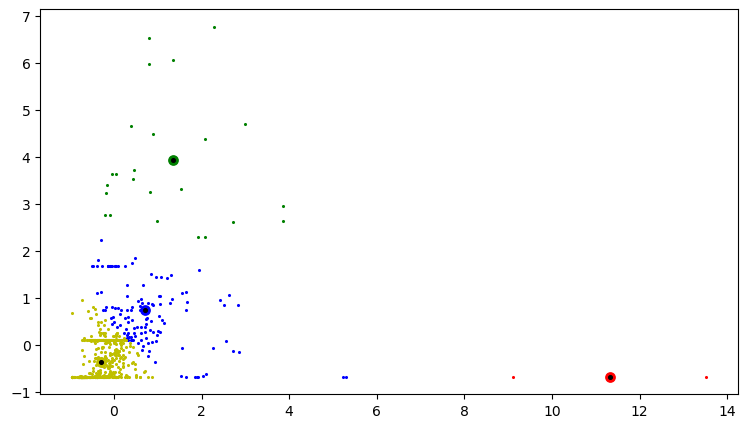

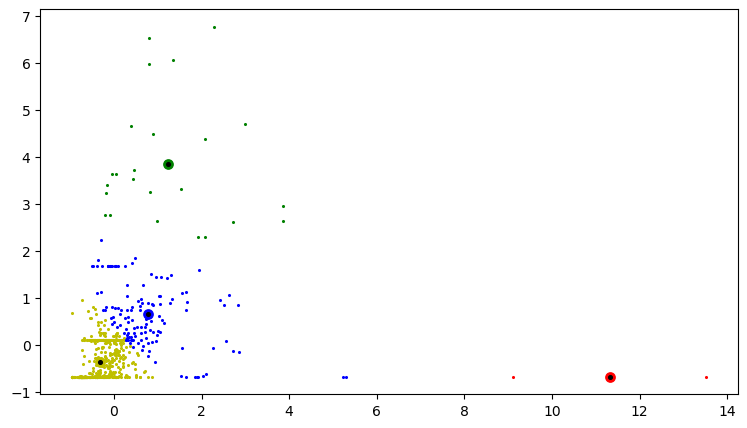

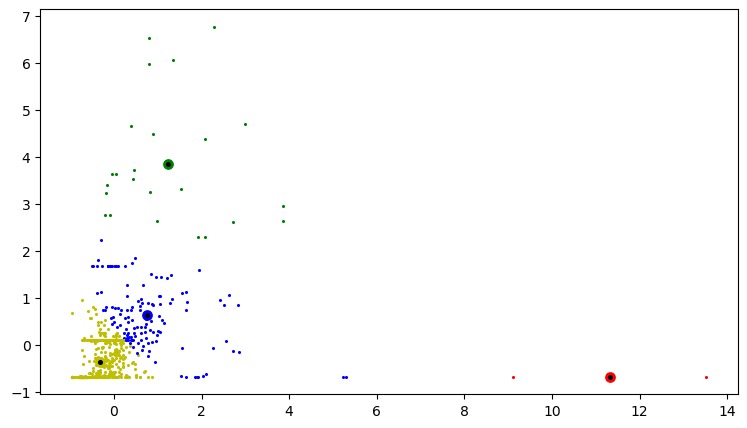

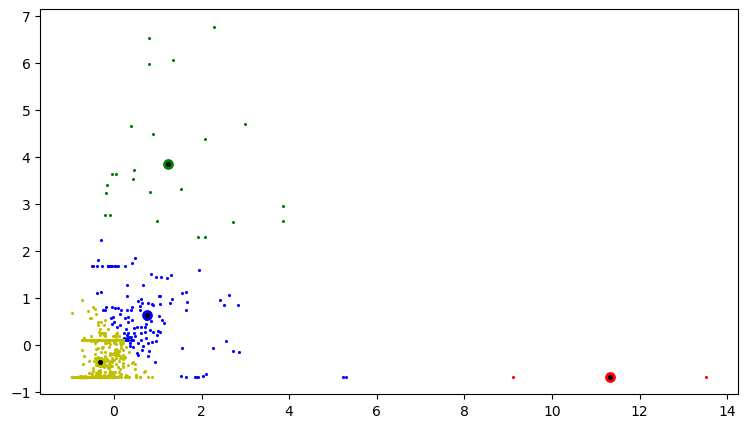

In [4]:
colors = {0:'y', 1:'g', 2:'b', 3:'r', 4:'m', 5:'k', 6:'c', 7:'darkgreen'}

for _ in range(10):
    #computing the clusters
    centroids_result = []
    for i in table:
        diff = []
        for j in centroids:
            diff.append(np.linalg.norm(i - j))
        centroids_result.append(np.where(diff == min(diff))[0][0])

    #ploting iteration
    plt.figure(figsize=(9,5))
        
    #clusters
    for i in range(len(table)):
        plt.scatter(table[i][0],
                    table[i][1],
                    c = colors[centroids_result[i]],
                    s = 1.5)
    
    #centroids
    j = 0
    #centroids1 = pd.DataFrame(centroids)
    for i in range(len(centroids)):
        plt.scatter(centroids[i][0],
                    centroids[i][1], 
                    c = colors[j], 
                    s = 45)
        j += 1
    
    for i in range(len(centroids)):
        plt.scatter(centroids[i][0],
                    centroids[i][1], 
                    c = 'k', 
                    s = 7)
    
    plt.show()
        
    #replacing centroids by new means
    centroids = []
    for i in set(centroids_result):
        temp = []
        c = 0
        for j in centroids_result:
            if (j == i):
                temp.append(table[c]) 
            c += 1
        centroids.append(np.mean(temp, axis=0))


